## **Import Library and Dataset**

In [1]:
#Import Library
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Preprocessing**

In [3]:
# Read the data in the XLSX file using pandas
file_path = '/content/drive/Shareddrives/Product_Base_Capstone/Machine_Learning/Dataset/Stunting Dataset.xlsx'
df = pd.read_excel(file_path)

In [49]:
#Display Information of dataset
df

,Sex,Age,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,F,56,2.9,50,11.0,90.0,Yes,No
1,F,20,3.3,49,11.1,80.5,No,No
2,M,4,2.8,48,6.5,63.0,No,No
3,F,14,2.0,49,7.0,71.0,Yes,No
4,M,32,3.2,49,11.0,88.7,Yes,No
...,...,...,...,...,...,...,...,...
9995,M,33,2.8,49,8.4,80.0,No,Yes
9996,M,41,3.1,48,9.6,80.0,No,Yes
9997,F,19,3.0,50,7.5,57.0,No,Yes
9998,M,26,3.0,50,9.8,82.0,No,Yes


In [4]:
#Finding Missing Data
df.isnull().sum()

Sex              0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
ASI Eksklusif    0
Stunting         0
dtype: int64

In [5]:
#Counting Stunting Case for each case
df['Stunting'].value_counts()

Yes    3312
No     3188
Name: Stunting, dtype: int64

In [6]:
#Display Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            6500 non-null   object 
 1   Age            6500 non-null   int64  
 2   Birth Weight   6500 non-null   float64
 3   Birth Length   6500 non-null   int64  
 4   Body Weight    6500 non-null   float64
 5   Body Length    6500 non-null   float64
 6   ASI Eksklusif  6500 non-null   object 
 7   Stunting       6500 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 406.4+ KB


In [7]:
#Checking the Dimension of dataset
df.shape

(6500, 8)

In [8]:
# Make dictionary for label encoding
sex_encoding = {'M': 1, 'F': 0}
asi_encoding = {'No': 0, 'Yes': 1}
stunting_encoding = {'No': 0, 'Yes': 1}

# Doing label encoding using map method
df['Sex'] = df['Sex'].map(sex_encoding)
df['ASI Eksklusif'] = df['ASI Eksklusif'].map(asi_encoding)
df['Stunting'] = df['Stunting'].map(stunting_encoding)

df

,Sex,Age,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,0,56,2.9,50,11.0,90.0,1,0
1,0,20,3.3,49,11.1,80.5,0,0
2,1,4,2.8,48,6.5,63.0,0,0
3,0,14,2.0,49,7.0,71.0,1,0
4,1,32,3.2,49,11.0,88.7,1,0
...,...,...,...,...,...,...,...,...
6495,1,53,2.9,49,15.0,96.0,0,1
6496,1,9,2.9,50,7.3,62.0,0,1
6497,0,20,1.8,48,7.3,73.0,1,1
6498,1,11,2.9,49,7.7,66.0,0,1


In [9]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

# Print the normalized DataFrame
print(normalized_df)

      Sex       Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0     0.0  0.948276      0.500000      0.727273     0.375000     0.637931   
1     0.0  0.327586      0.681818      0.636364     0.379630     0.474138   
2     1.0  0.051724      0.454545      0.545455     0.166667     0.172414   
3     0.0  0.224138      0.090909      0.636364     0.189815     0.310345   
4     1.0  0.534483      0.636364      0.636364     0.375000     0.615517   
...   ...       ...           ...           ...          ...          ...   
6495  1.0  0.896552      0.500000      0.636364     0.560185     0.741379   
6496  1.0  0.137931      0.500000      0.727273     0.203704     0.155172   
6497  0.0  0.327586      0.000000      0.545455     0.203704     0.344828   
6498  1.0  0.172414      0.500000      0.636364     0.222222     0.224138   
6499  0.0  0.224138      0.500000      0.636364     0.166667     0.224138   

      ASI Eksklusif  Stunting  
0               1.0       0.0  
1          

In [16]:
#Data Splitting
# Separating the Feature and Labels
X = normalized_df.drop(columns=["Stunting"])
y = normalized_df["Stunting"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=64)

## **Model Architecture**

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(
    loss=bce,
    optimizer=optimizer,
    metrics=['accuracy']
)

In [19]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/100
46/46 [==============================] - 2s 7ms/step - loss: 0.6575 - accuracy: 0.6556 - val_loss: 0.6191 - val_accuracy: 0.6938
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.5878 - accuracy: 0.7152 - val_loss: 0.5880 - val_accuracy: 0.6938
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.5547 - accuracy: 0.7171 - val_loss: 0.5358 - val_accuracy: 0.7000
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 0.5009 - accuracy: 0.7574 - val_loss: 0.4632 - val_accuracy: 0.8046
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 0.4435 - accuracy: 0.8039 - val_loss: 0.3969 - val_accuracy: 0.8292
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 0.3991 - accuracy: 0.8284 - val_loss: 0.3713 - val_accuracy: 0.8738
Epoch 7/100
46/46 [==============================] - 0s 7ms/step - loss: 0.3647 - accuracy: 0.8542 - val_loss: 0.3319 - val_accuracy: 0.8600
Epoch 8/100
4

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                512       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.predict(np.array([[0,	56,	2.9,	50,	11,	90,	1	]]))

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

## **Model Evaluation**

21/21 [==============================] - 0s 1ms/step


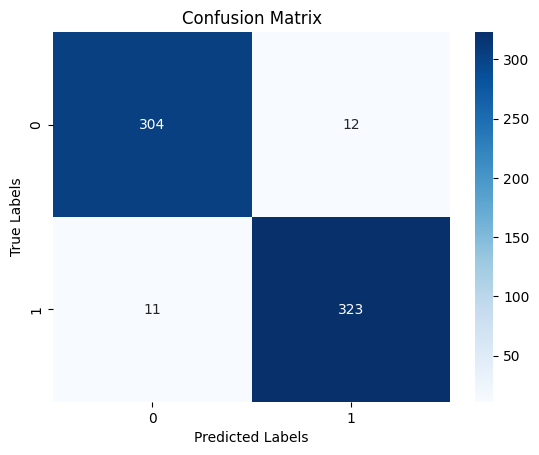

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert continuous variable to binary labels
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Create the confusion matrix
confusion = confusion_matrix(y_pred_binary, y_test)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")

# Set the axis labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Set the title
plt.title("Confusion Matrix")

# Display the plot
plt.show()

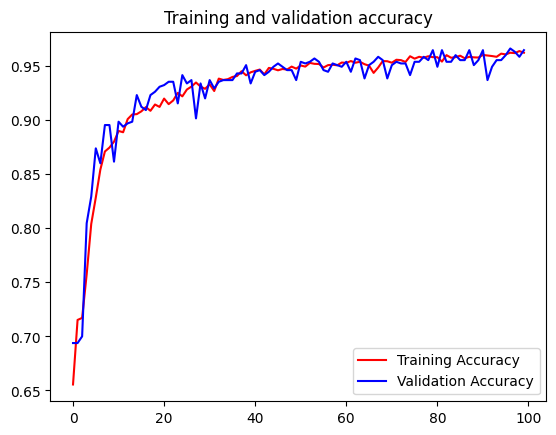

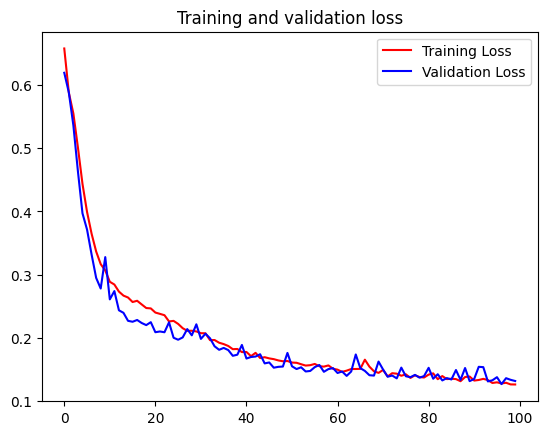

In [23]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()  # Add legend to the plot
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()  # Add legend to the plot
plt.show()


## **Save Model**

In [25]:
# Save your model
model.save('saved_model')

In [26]:
# Save your model
model.save('model.h5')

## **Export the Model**

In [27]:
# Convert the SavedModel to TFLite format with optimizations
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Apply default optimizations
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
